In [1]:
from dataset import CustomDataset

d = CustomDataset()

(256, 256, 3)


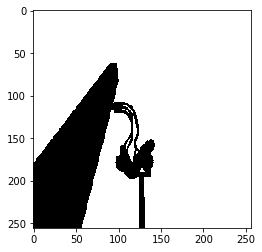

In [2]:
import matplotlib.pyplot as plt
dd = d[10]
plt.imshow(dd[0][0],cmap='gray')

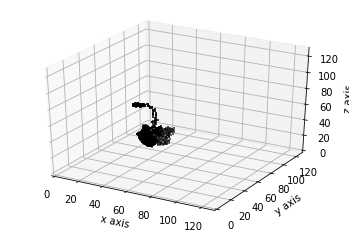

In [3]:
og = dd[1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
gs=128
ax.set_xlim(0,gs)
ax.set_ylim(0,gs)
ax.set_zlim(0,gs)
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")

x,y,z= og.numpy().nonzero()
ax.scatter(x, y, z, marker='s',s=1,color='black')


In [4]:
from encoder import Encoder
from decoder import Decoder
from torch.utils.data import DataLoader
import numpy as np
import torch

dataloader = DataLoader(d,batch_size=1,shuffle=True)
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch)

    # observe 4th batch and stop.
    if i_batch == 3:
        encoder = Encoder()
        decoder = Decoder()
        x = sample_batched[0]
        y = sample_batched[1]
        print("ENCODING...")
        output = encoder(x)
        output = output.view(1,1,1,128)
        print(output.size())
        print("DECODING...")
        output = decoder(output)
        break

(256, 256, 3)
0
(256, 256, 3)
1
(256, 256, 3)
2
(256, 256, 3)
3
ENCODING...
**input** torch.Size([1, 11, 256, 256])
**1** torch.Size([1, 32, 128, 128])
**2** torch.Size([1, 32, 64, 64])
**3** torch.Size([1, 8, 1, 32, 32])
**4** torch.Size([1, 8, 1, 16, 16])
**5** torch.Size([1, 8, 1, 8, 8])
**drop_out** torch.Size([1, 1, 512])
**fc1** torch.Size([1, 1, 256])
**mu** torch.Size([1, 1, 128])
**var** torch.Size([1, 1, 128])
tensor([[[-0.0599, -0.2181,  0.0769, -0.1967, -0.1406, -0.0882, -0.2552,
           0.0529,  0.0968,  0.5255, -0.6973, -0.1731,  0.0069,  0.3970,
          -0.2904,  0.0030, -0.0621, -0.5704,  0.2248,  0.1585, -0.6626,
           0.4600, -0.0781,  0.0319, -0.8321, -0.4399, -0.2306, -0.1251,
           0.0668,  0.4077,  0.4720,  0.0203, -0.4672, -0.2736, -0.0827,
           0.2592,  0.1590, -0.3511,  0.3985, -0.2264,  0.9435, -0.0682,
           0.5149, -0.1550,  0.0249, -0.1767,  0.1596, -0.3098,  0.5526,
           0.0256,  0.1172, -0.3914,  0.4805, -0.6890,  0.1668, -

In [5]:
output

tensor([[[[[0.1254, 0.1253, 0.1255,  ..., 0.1253, 0.1256, 0.1254],
           [0.1260, 0.1252, 0.1262,  ..., 0.1252, 0.1263, 0.1255],
           [0.1253, 0.1256, 0.1258,  ..., 0.1255, 0.1257, 0.1256],
           ...,
           [0.1260, 0.1253, 0.1263,  ..., 0.1253, 0.1263, 0.1255],
           [0.1253, 0.1256, 0.1259,  ..., 0.1255, 0.1258, 0.1256],
           [0.1258, 0.1251, 0.1261,  ..., 0.1251, 0.1260, 0.1254]],

          [[0.1254, 0.1258, 0.1254,  ..., 0.1258, 0.1254, 0.1258],
           [0.1253, 0.1256, 0.1247,  ..., 0.1256, 0.1247, 0.1255],
           [0.1256, 0.1257, 0.1255,  ..., 0.1257, 0.1256, 0.1259],
           ...,
           [0.1254, 0.1255, 0.1247,  ..., 0.1255, 0.1247, 0.1255],
           [0.1256, 0.1258, 0.1255,  ..., 0.1258, 0.1255, 0.1259],
           [0.1256, 0.1258, 0.1249,  ..., 0.1258, 0.1249, 0.1259]],

          [[0.1251, 0.1255, 0.1248,  ..., 0.1254, 0.1247, 0.1254],
           [0.1263, 0.1250, 0.1262,  ..., 0.1250, 0.1263, 0.1255],
           [0.1252, 0.1259

In [10]:
from torch.nn import CrossEntropyLoss as CEL
loss = CEL()
L = loss(output,y)
L

tensor(2.0472, grad_fn=<NllLoss2DBackward>)

In [11]:
import torch.optim as optim
encoder_optimizer = optim.Adam(encoder.parameters(), lr=0.0001)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=0.0001)
L.backward()
encoder_optimizer.step()
decoder_optimizer.step()